In [109]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing the results

In [73]:
currdir = os.getcwd()
regex_name = r'(([A-Z])\w+)'
batchrun = '600s-run1'

In [74]:
entrances = [
    '0x3 - Northern_Southbound',
    '0x0 - Eastern_Westbound',
    '0x1 - Southern_Northbound',
    '0x2 - Western_EastBound'
]

exits = [
    '0x4 - Southern_Southbound',
    '0x5 - Eastern_Eastbound',
    '0x6 - Western_WestBound',
    '0x7 - Northern_Northbound'
]

entrances_rename = {
    '0x3 - Northern_Southbound': 'north',
    '0x0 - Eastern_Westbound': 'east',
    '0x1 - Southern_Northbound': 'south',
    '0x2 - Western_EastBound': 'west'
}

exits_rename = {
    '0x4 - Southern_Southbound': 'south',
    '0x5 - Eastern_Eastbound': 'east',
    '0x6 - Western_WestBound': 'west',
    '0x7 - Northern_Northbound': 'north'
}

df[entrances][df.t == 'Average Delay']

,0x3 - Northern_Southbound,0x0 - Eastern_Westbound,0x1 - Southern_Northbound,0x2 - Western_EastBound
3,37.035551,117.275182,193.163998,55.849012


In [75]:
df_delay = pd.DataFrame(data=[], index=[], columns=entrances+['demand', 'cycle'])
df_throughput = pd.DataFrame(data=[], index=[], columns=exits+['demand', 'cycle'])

for demand in range(450,901,50):
    for cycle in range(50,301,50):
        filename = currdir + '/tmp/{}/result_d{}_c{}.xls'.format(batchrun, demand, cycle)
        df_tmp = pd.read_excel(filename, sheet_name='Speed')
        
        df_tmp_delay = df_tmp[entrances][df_tmp.t == 'Average Delay']
        df_tmp_delay['demand'] = [demand]
        df_tmp_delay['cycle'] = [cycle]
        df_delay = pd.concat([df_delay, df_tmp_delay])
        
        df_tmp_through = df_tmp[exits][df_tmp.t == 'Throughput']
        df_tmp_through['demand'] = [demand]
        df_tmp_through['cycle'] = [cycle]
        df_throughput = pd.concat([df_throughput, df_tmp_through])

In [76]:
df_delay.rename(columns=entrances_rename, inplace=True)
df_throughput.rename(columns=exits_rename, inplace=True)

In [77]:
df_delay.to_pickle('{}-delay.pkl'.format(batchrun))
df_throughput.to_pickle('{}-throughput.pkl'.format(batchrun))

## Combine and average the runs

In [92]:
df1 = pd.read_pickle('600s-run1-delay.pkl')
df2 = pd.read_pickle('600s-run2-delay.pkl')

In [93]:
df_delay = pd.concat([df1, df2])
df_delay = df_delay.groupby(['demand', 'cycle']).agg('mean')

In [94]:
df_delay

north        east       south        west
demand cycle                                                
450    50      23.218619   26.770080   26.194103   25.765060
       100     64.696325   30.177960   39.122945   38.083821
       150     41.878850   74.200182   61.254907   54.056044
       200     46.539179   47.622743  104.310673   64.013671
       250     53.755968   89.462682   67.897507  129.507967
       300    156.510205   68.858516  107.254320   53.463652
500    50      30.791605   53.568833   25.916699   39.859841
       100     33.209716   28.832000   31.516361   32.233463
       150     59.290424   43.172618   64.603663   71.002198
       200     56.719810   68.804594   70.709890   59.856044
       250    130.919810   87.925182   90.887565   79.990659
       300     79.530921   71.094148   93.203365   59.961599
550    50      23.847346   28.290108   27.486965   32.073691
       100     54.440373   43.217490   48.362382   44.125897
       150     43.982905   52.491528   57.535496   56.283821
       200     41.067820   71.593932   96.100399   68.296428
       250     76.782679   76.334273   87.029258   90.126166
       300     94.333500  103.558077  111.450274   95.737862
600    50      20.982081   30.844023   22.506702   25.632710
       100     44.477924   52.256800   54.962294   66.684615
       150    108.989702  128.441849   76.486191   44.177256
       200     87.158352   70.493932   80.306044   71.094505
       250     78.297003   78.284616  149.777742  187.775871
       300     84.702217   49.051224   84.704070   62.106044
650    50      36.366477   39.168039   65.685257   34.912427
       100     79.730707   65.520637  140.903870   76.995329
       150     52.924860  110.870010  150.578432   74.299946
       200    103.154658   57.658516   92.523786   81.035882
       250     86.740971  102.015182  119.941637  152.116389
       300    194.461477   82.458516  107.052367   83.406044
700    50      48.466579   57.422241   32.147190   49.050889
       100     66.081715   93.709393  117.255319   62.595816
       150     74.607663  168.106815  113.394753   95.403700
       200     59.589028   67.160896   88.232100  242.287525
       250     90.310435   80.247404  115.239637   86.005448
       300    129.719810   59.488597  107.748979   78.293544
750    50      48.963977   69.534557   55.088095   29.078022
       100     72.089286   83.426345   85.250897  127.392407
       150     37.035551  117.275182  193.163998   55.849012
       200     68.223105   98.176224  149.889377   71.465526
       250     86.645687  161.691849  116.919680  140.110922
       300    115.043508   92.280501  126.478122   66.434093
800    50      42.477891   61.471611  130.932417   59.899181
       100     42.836477  130.476402  166.265603   48.151632
       150    121.653937  106.525182  154.354551   61.186858
       200    133.606140  109.434757  103.957942   40.663187
       250    103.415745  107.356168  115.836044  200.841758
       300    195.839949   81.100182  113.979573   89.649794
850    50      88.391422   35.503443  113.163187   71.875631
       100     54.597466   73.641849  136.942948   65.697348
       150     99.328498   88.913480  130.873117   93.028605
       200     80.772374   66.080738   95.141338   80.007131
       250    118.358913  108.418625  111.663187  116.249440
       300    146.926282   91.416849  125.198486  101.756044
900    50      49.808216   61.062344   64.634873   61.318670
       100    140.244085  113.361248  115.633630  110.766271
       150    144.150156  216.852105  153.075781  135.728175
       200     92.633774  135.228307  130.572898  107.163802
       250    109.511477  117.669250  169.602919  145.491338
       300    143.625312  118.191849  129.705237   38.106044

In [97]:
df1 = pd.read_pickle('600s-run1-throughput.pkl')
df2 = pd.read_pickle('600s-run2-throughput.pkl')

In [98]:
df_throughput = pd.concat([df1, df2])
df_throughput = df_throughput.groupby(['demand', 'cycle']).agg('mean')

In [99]:
df_throughput

south   east   west  north
demand cycle                            
450    50      65.0   69.0   68.0   78.0
       100     71.0   76.0   77.0   69.0
       150     47.0   57.0   54.0   42.0
       200     67.0   57.0   61.0   77.0
       250     53.0   50.0   76.0   64.0
       300     33.0   53.0   44.0   39.0
500    50      85.0   78.0   80.0   80.0
       100     68.0   66.0   66.0   75.0
       150     70.0   74.0   62.0   71.0
       200     60.0   60.0   59.0   69.0
       250     63.0   63.0   58.0   60.0
       300     65.0   75.0   69.0   49.0
550    50      91.0   80.0   97.0   93.0
       100     68.0   71.0   85.0   80.0
       150     70.0   80.0   71.0   74.0
       200     56.0   79.0   73.0   72.0
       250     68.0   84.0   71.0   79.0
       300     66.0   38.0   74.0   65.0
600    50      90.0   81.0   97.0   86.0
       100     85.0   89.0   84.0  100.0
       150     73.0   86.0   57.0   59.0
       200     77.0   72.0   72.0   69.0
       250     79.0   65.0   77.0   65.0
       300     39.0   58.0   75.0   60.0
650    50      99.0   98.0  107.0   93.0
       100     77.0   59.0   84.0   83.0
       150     78.0   76.0   77.0   71.0
       200     73.0   74.0   80.0   73.0
       250     58.0   75.0   60.0   65.0
       300     48.0   60.0   68.0   73.0
700    50      91.0  113.0  102.0  102.0
       100     81.0   85.0   98.0   95.0
       150     60.0   64.0   75.0   74.0
       200     63.0   62.0   82.0   52.0
       250     80.0   68.0   69.0   97.0
       300     84.0  100.0   93.0   69.0
750    50     102.0  101.0   94.0   86.0
       100     79.0   71.0   69.0   77.0
       150     89.0   80.0   86.0   64.0
       200     65.0   69.0   84.0   68.0
       250     88.0   65.0   62.0   66.0
       300     67.0   63.0   67.0   74.0
800    50     107.0  105.0   76.0  110.0
       100     76.0   85.0   74.0   67.0
       150     84.0   72.0   75.0   91.0
       200     66.0   78.0   89.0   63.0
       250     89.0   53.0   75.0   56.0
       300     59.0   78.0   94.0   78.0
850    50      96.0  100.0   95.0  116.0
       100     92.0   97.0   86.0  101.0
       150     78.0   84.0   91.0   91.0
       200     41.0   74.0   73.0   66.0
       250     81.0   57.0   61.0   69.0
       300     67.0   93.0   89.0   73.0
900    50     103.0  124.0  106.0  109.0
       100     93.0   95.0   96.0   97.0
       150     70.0   90.0   81.0   65.0
       200     82.0   97.0   95.0   77.0
       250     89.0   78.0   63.0   67.0
       300     67.0   58.0   76.0   63.0

## Visualizing how delay changes

In [107]:
df_delay_map = df_delay.mean(axis=1).reset_index().pivot(index='demand', columns='cycle', values=0)
df_delay_map

cycle,50,100,150,200,250,300
demand,,,,,,
450,25.486966,43.020263,57.847496,65.621567,85.156031,96.521673
500,37.534245,31.447885,59.517226,64.022584,97.430804,75.947508
550,27.924527,47.536535,52.573438,69.264645,82.568094,101.269928
600,24.991379,54.595408,89.523749,77.263208,123.533808,70.140889
650,44.033050,90.787636,97.168312,83.593211,115.203545,116.844601
700,46.771725,84.910561,112.878233,114.317387,92.950731,93.812732
750,50.666163,92.039734,100.830936,96.938558,126.342034,100.059056
800,73.695275,96.932528,110.930132,96.915506,131.862429,120.142374
850,77.233421,82.719903,103.035925,80.500395,113.672541,116.324415


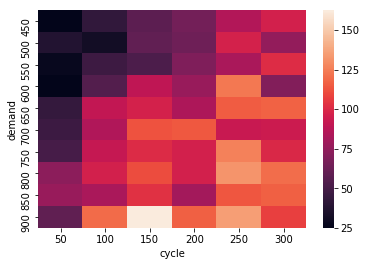

In [110]:
sns.heatmap(data=df_delay_map)

## Visualizing how throughput changes

In [111]:
df_throughput_map = df_throughput.mean(axis=1).reset_index().pivot(index='demand', columns='cycle', values=0)
df_throughput_map

cycle,50,100,150,200,250,300
demand,,,,,,
450,70.00,73.25,50.00,65.50,60.75,42.25
500,80.75,68.75,69.25,62.00,61.00,64.50
550,90.25,76.00,73.75,70.00,75.50,60.75
600,88.50,89.50,68.75,72.50,71.50,58.00
650,99.25,75.75,75.50,75.00,64.50,62.25
700,102.00,89.75,68.25,64.75,78.50,86.50
750,95.75,74.00,79.75,71.50,70.25,67.75
800,99.50,75.50,80.50,74.00,68.25,77.25
850,101.75,94.00,86.00,63.50,67.00,80.50


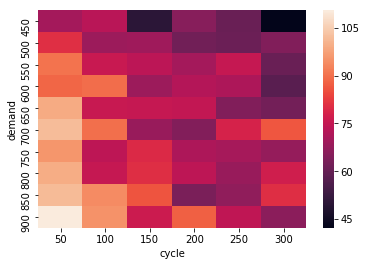

In [112]:
sns.heatmap(data=df_throughput_map)